<a href="https://colab.research.google.com/github/garylau1/model_training/blob/main/graph_explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step by Step graph neural network:

In this project we would explore the graph neural network.
Our goal:
- We would explore the graphs and the relevant concepts(such as edges and nodes)

- We will review some of the difficult concept in mathplolib to show our graph

- To do node embedding by using dot product

Next we will make GNN models to do nodes classfication task.We will choose GCN,SAGE and GAT models.

We firstly make a graph to demonstrate how it works:

In [3]:
import networkx as nx

In [4]:
G = nx.Graph()
print(G.graph)
G.add_node(0, feature=10, label=0)   #add 10 features for nodes 0
G.add_nodes_from([
  (1, {"feature": 3, "label": 1}),      # add node1 with :3 features,label 1 into node 1 and  node 2: 5 features and label 2
  (2, {"feature": 5, "label": 2})
]) #(node, attrdict)

G.nodes(data=True)
G.add_edge(0, 2, weight=0.8)   #add the edge between 0 and 2
edge_0_1_attr = G.edges[(0, 2)]
print ("edge of G",G.edges)

{}
edge of G [(0, 2)]


In [5]:
G.add_edges_from([(1,2,{"weight1":0.3}),(1,0,{"weight2":0.4})]) #add more edges

for i in G.edges(data=True):
  print (i)
print (G.number_of_edges())

(0, 2, {'weight': 0.8})
(0, 1, {'weight2': 0.4})
(1, 2, {'weight1': 0.3})
3


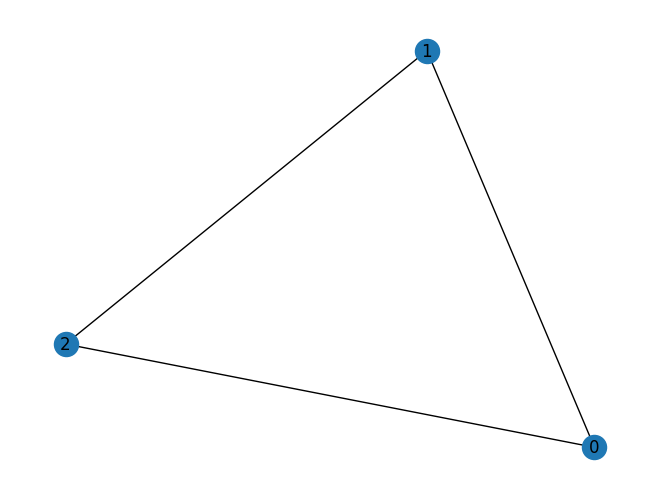

In [6]:
nx.draw(G,with_labels=True) #we can draw it

In [7]:
nx.pagerank(G, alpha=1.1)  #we can see the importance of the nodes to other nodes are equal in this cases

{0: 0.3206899043548301, 1: 0.3586201912903381, 2: 0.3206899043548301}

In [8]:
for i in range(len(G)):
  print ("Node{} has degree{}".format(i,G.degree[i]))   #as a result they have the same degree(the same edges)

Node0 has degree2
Node1 has degree2
Node2 has degree2


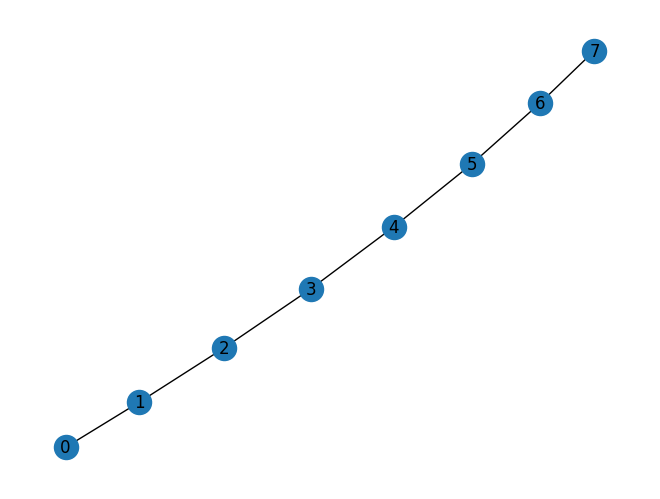

In [9]:
W = nx.path_graph(8)
nx.draw(W,with_labels=True)   #draw other linear graph with 8 nodes


In [10]:
total=0
for i in nx.pagerank(G, alpha=0.3).keys():       #We can see sum of the nx.pagerank value for each node are equal to 1
  total=total+nx.pagerank(G, alpha=0.9)[i]

total

1.0000000000000002

In [11]:
import torch

!pip install -q torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 441.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.7 MB/s eta 0:00:00


In this section we review some of the matplotlib codes and we use in our example:

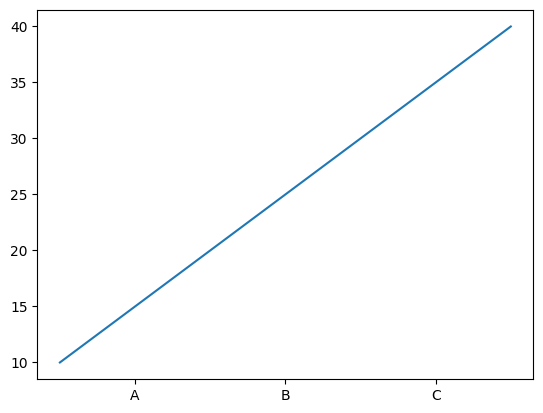

In [12]:
#we use matplotlib and show the example of plotting with xticks

%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample plot
plt.plot([1, 2, 3, 4], [10, 20, 30, 40])

# Set x-axis ticks at specific positions with custom labels
plt.xticks([1.5, 2.5, 3.5], ['A', 'B', 'C'])

# Show the plot
plt.show()

#we can see the meaning of xtick is to add the ticks[A,B,C] into the x axis.

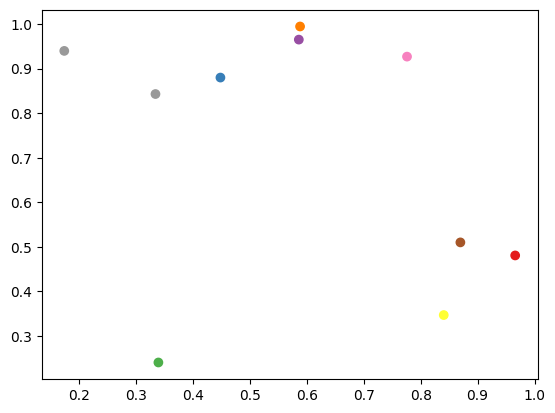

In [13]:
import matplotlib.pyplot as plt
import numpy as np     #we demonstrate the scatter plot with order

x = np.random.rand(10)
y = np.random.rand(10)
z = np.arange(10)
#z=['red', 'green', 'blue'] * 33
plt.scatter(x,y, c=z, cmap='Set1')
plt.show()

#it is repeated as there are 9 type of colour in Set 1 and we give 10 points

In [14]:
x,y,z

#you can see it is in order stated in the website : the first point in array is red and the second point is blue ....
#https://matplotlib.org/stable/users/explain/colors/colormaps.html

(array([0.9660334 , 0.44822585, 0.33925579, 0.58595084, 0.58813374,
        0.84054747, 0.86977272, 0.77601863, 0.1738893 , 0.33411206]),
 array([0.48062329, 0.87980087, 0.24040238, 0.96498652, 0.99445084,
        0.34683584, 0.50990073, 0.92680499, 0.9396536 , 0.84285187]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

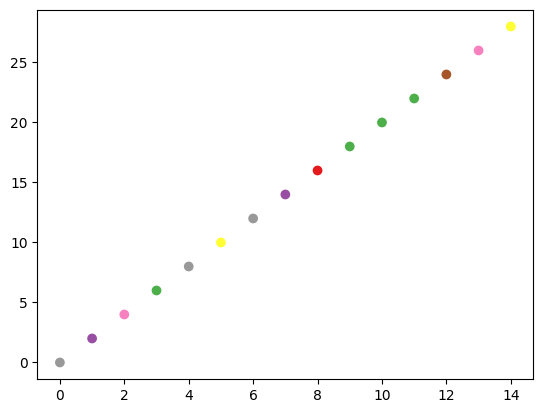

In [15]:
x = np.arange(0,15)
y = np.arange(0,30,2)
z = np.random.rand(15)
#z=np.arange(1,16)
plt.scatter(x,y, c=z, cmap='Set1')
plt.show()



In [16]:
#in z: we can see red and blue colours(3rd,4th,5th,6th) are the 1st and second one in the qualitive map since they have smallest value in z.

#grey colour has the highest value 0.99 in the colour map

#https://matplotlib.org/stable/users/explain/colors/colormaps.html

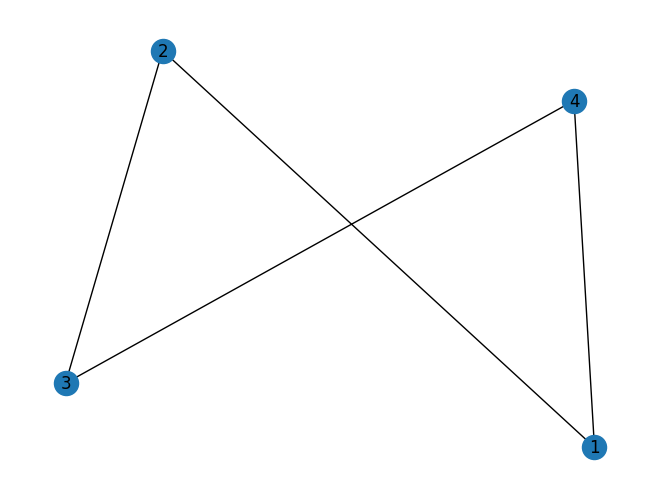

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a simple graph again
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

# Calculate node positions using spring layout
pos = nx.spring_layout(G, seed=100)    #the distribution of nodes of the setting are fix with seed=100

# Draw the graph
nx.draw(G,pos=pos, with_labels=True)
plt.show()

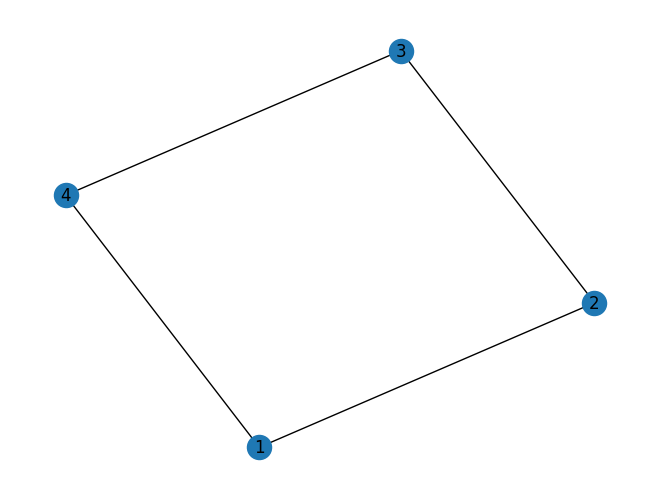

In [18]:
pos = nx.spring_layout(G, seed=99)    #different seed of the spring_layout with the same graph G has different plot
nx.draw(G,pos=pos, with_labels=True)
plt.show()

Now We create a function with mathplotlib for the graph:


- We use detach as we need to turn torch tensor object(h) into a mode that we dont keep track of the gradients. We also need to convert into numpy object to diplay it.

- xticks and yticks are empty implied we dont need (we have review of xticks above)

- we have plot.scatter(list of points in x axis,list of points in y axis ,size of the points,the colour index of the colour map,colur map we choose )

- loss.item() means we extract the intreger from the loss(which is tensor object).

In [19]:
def graph_plot(h,color,epoch=None,loss=None,accuracy=None):
  plt.figure(figsize=(10,10))
  plt.xticks([])
  plt.yticks([])

  if torch.is_tensor(h):
    h=h.detach().cpu().numpy()

    plt.scatter(h[:0],h[:1],s=130,c=color,cmap="Set1")
    if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)



  else:
    nx.draw_networkx(h, pos=nx.spring_layout(h, seed=42), with_labels=False,   #we have the nx.spring_layour as well/
                         node_color=color, cmap="Set1")
    plt.show()

Next we start to explore our dataset KarateClub:

In [20]:
from torch_geometric.datasets import KarateClub

dataset=KarateClub()

print (f"Our dataset has len {len(dataset)}\n" f"and number of feature:{dataset.num_features}\n" f"and number of class:{dataset.num_classes}\n" )


Our dataset has len 1
and number of feature:34
and number of class:4



In [21]:
data=(dataset[0])
type(dataset),(type(dataset[0]))
#we need the instance data from the class torch_geometric

(torch_geometric.datasets.karate.KarateClub, torch_geometric.data.data.Data)

In [22]:
len(data.edge_index.T),print(data.edge_index) #we print the number of the edges and the nodes of this graph

#we can see the first element of the first row is linked into the first element of the second row (0 to 1 ,0 to 2....)
#The edges can be understood in such way

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3,  0,  2, 30, 32, 33,  2, 33,  0,  4

(156, None)

In [23]:
   #make it clearly by printing out the first 10 pairs of edges
print(data.edge_index.t()[0:10])

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11]])


In [24]:
data.x,(data.y)  #print out the position of the data e.g [1., 0., 0.,  ..., 0., 0., 0.] mean the node is in the first position
#we have the label of this data as well(There are 4 classes).

(tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]),
 tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
         2, 2, 0, 0, 2, 0, 0, 2, 0, 0]))

In [25]:
data  #we have four object in the this data

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


AttributeError: 'GlobalStorage' object has no attribute 'is_multigraph'

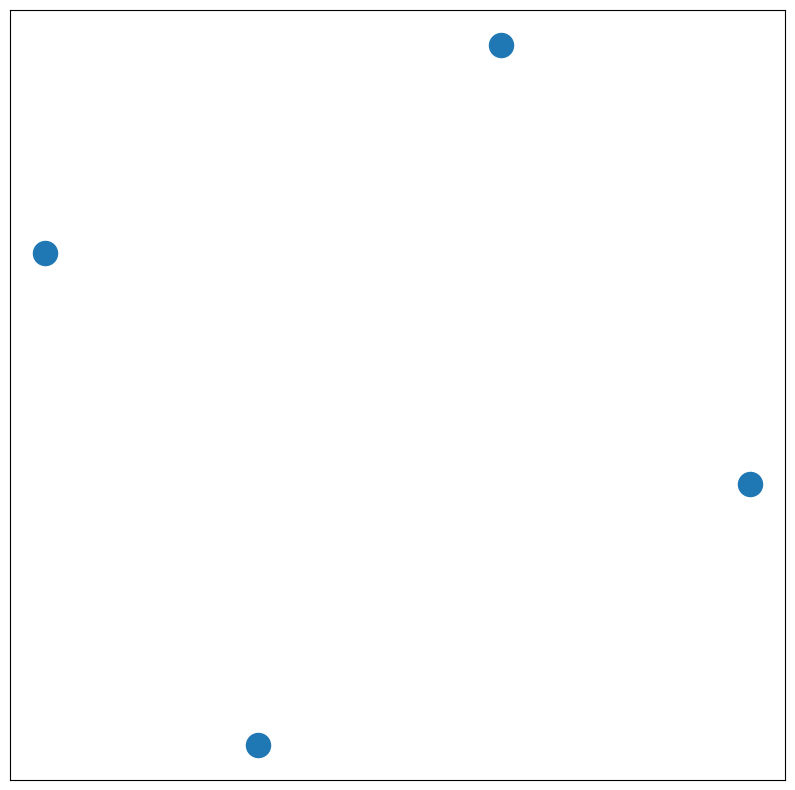

In [ ]:
graph_plot(data,color=None)


# However, the GlobalStorage class or object does not have this attribute defined.
#We are not assumed to plot like this since nx.draw_networkx in the function only accepted graph object.
#next we need to convert back data into a graph object


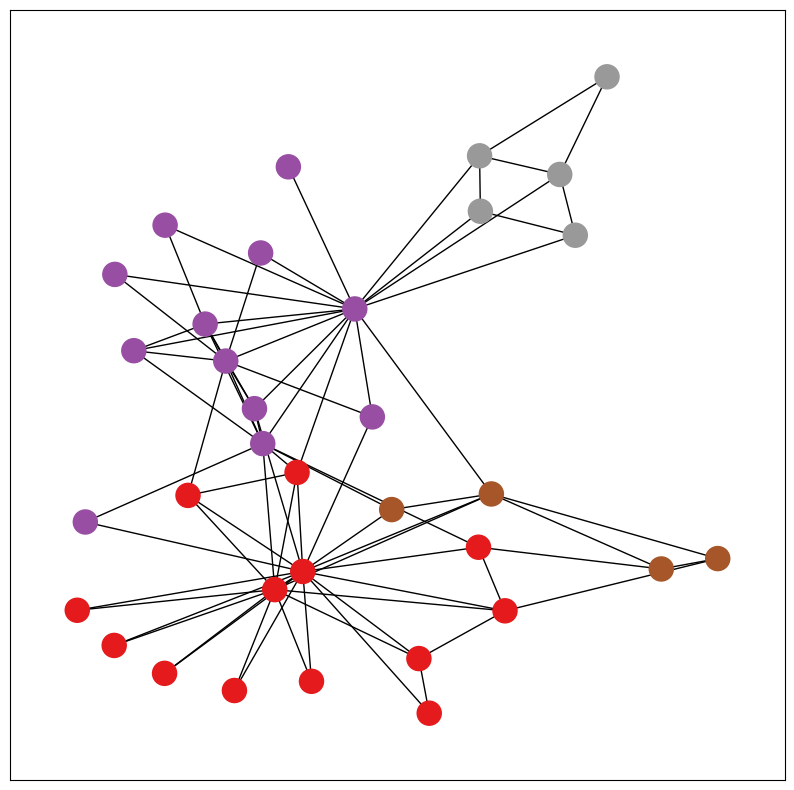

In [26]:
from torch_geometric.utils import to_networkx
#turn into graph object called Data
Data= to_networkx(data, to_undirected=True)
Data

graph_plot(Data,color=data.y)

In [27]:
2*Data.number_of_edges(),Data.number_of_nodes(),round(2*Data.number_of_edges()/Data.number_of_nodes()),nx.average_clustering(Data)

#number of edges,number of node and average number of degrees,avergae_clustering (to count who closed of each nodes in graph)
#we need to mutiply by 2 as this Data has only edges in one direction e.g it counts (0,1) but didnt count (1,0)

#the avergae_clustering is 0.57 which means it is sligher closer to each others

(156, 34, 5, 0.5706384782076823)

Node embedding:

We will start from Pytorch tensor

In [28]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



In [29]:

edge_list=data.edge_index.t()  #we need a list of edges


In [30]:
# We created a embedding. Suppose we have 5 nodes and each nodes has embedding of 3:

embedding=nn.Embedding(num_embeddings=5, embedding_dim=3)

for i in range(4):
  print (embedding(torch.tensor([i,i+1])))  #we print out the embedding for i and i+1 rows

print (embedding(torch.tensor([0,1,2])))
#we print out the first ,second and third rows of the embedding.

tensor([[ 1.3542, -0.1811, -0.1509],
        [-2.4983,  1.8385,  0.5317]], grad_fn=<EmbeddingBackward0>)
tensor([[-2.4983,  1.8385,  0.5317],
        [ 0.8570,  0.2222,  0.1511]], grad_fn=<EmbeddingBackward0>)
tensor([[ 0.8570,  0.2222,  0.1511],
        [ 0.4642, -0.2776,  0.1397]], grad_fn=<EmbeddingBackward0>)
tensor([[ 0.4642, -0.2776,  0.1397],
        [ 1.3918,  0.9572,  1.4664]], grad_fn=<EmbeddingBackward0>)
tensor([[ 1.3542, -0.1811, -0.1509],
        [-2.4983,  1.8385,  0.5317],
        [ 0.8570,  0.2222,  0.1511]], grad_fn=<EmbeddingBackward0>)


In [31]:
embedding.weight,embedding.weight.data   #this is the weight and the data (without gradient tracking)

(Parameter containing:
 tensor([[ 1.3542, -0.1811, -0.1509],
         [-2.4983,  1.8385,  0.5317],
         [ 0.8570,  0.2222,  0.1511],
         [ 0.4642, -0.2776,  0.1397],
         [ 1.3918,  0.9572,  1.4664]], requires_grad=True),
 tensor([[ 1.3542, -0.1811, -0.1509],
         [-2.4983,  1.8385,  0.5317],
         [ 0.8570,  0.2222,  0.1511],
         [ 0.4642, -0.2776,  0.1397],
         [ 1.3918,  0.9572,  1.4664]]))

In [32]:
def embedding_creation(num_node=34,embedding_dim=4):
  embedding=nn.Embedding(num_node,embedding_dim)
  embedding.weight.data.uniform_(0, 1)   #we want to restart the values between 0 and 1 inside the embedding
  return embedding

embedding_new = embedding_creation()

In [33]:
embedding_new(torch.tensor([1,3,5,7])) #print the embedding of these nodesdata.x,data.y

tensor([[0.7226, 0.4068, 0.1092, 0.1107],
        [0.0473, 0.8964, 0.1770, 0.4583],
        [0.2738, 0.6641, 0.9245, 0.5577],
        [0.2636, 0.8618, 0.0200, 0.4562]], grad_fn=<EmbeddingBackward0>)

In [34]:
#we recreate the graph for simplicity
G = nx.karate_club_graph()

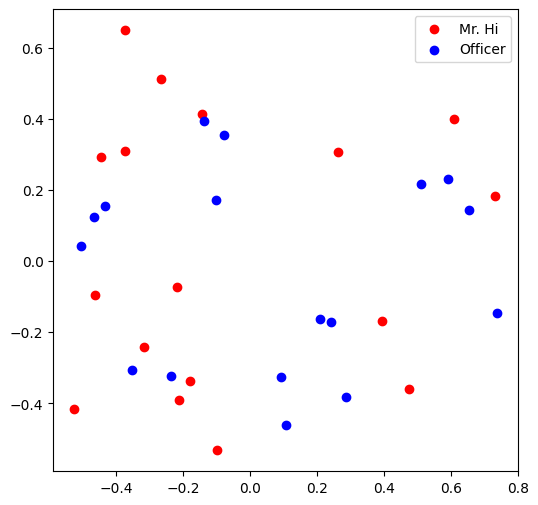

In [35]:
from sklearn.decomposition import PCA
##Principal component analysis (PCA) reduces the number of dimensions
#in large datasets to principal components that retain most of the original information.
#for more reference:
##https://www.kdnuggets.com/2023/05/principal-component-analysis-pca-scikitlearn.html

#https://builtin.com/data-science/step-step-explanation-principal-component-analysis#:~:text=PCA%20reduces%20the%20number%20of,avoid%20overfitting%20in%20a%20model.
def visualize_emb(emb,G=G):
  X = emb.weight.data.numpy()    # we need the embedding vectors for all 34 rows (nodes)
  pca = PCA(n_components=2)
  components = pca.fit_transform(X) #transform it using vector caluclus and linear algebra ways
  plt.figure(figsize=(6, 6))
  club1_x = []  #store list of the points(embedding) in x axis for Mr.Hi club
  club1_y = []  #store list of the points in y axis for Mr.Hi club
  club2_x = []  #store list of the points in x axis for Officer club
  club2_y = []  #store list of the points in y axis for Officer club
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi': #add the transformed_embedding (with two dimension) in X we create
      #node[0] is the node number,node[1] is the dictionary of club as key
      club1_x.append(components[node[0]][0])   #this is the x component of the embedding components[node number]
      club1_y.append(components[node[0]][1])   #this is the y component of the embedding components[node number]
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(embedding_new)

In [36]:
G.has_edge(8,17)  #we can check whether it has the edged(8,17)

False

In [37]:
# After converting the PyTorch Geometric graph to NetworkX
print(G.nodes(data=True))  # Prints nodes with their attributes
print(G.edges(data=True))  # Prints edges with their attributes

[(0, {'club': 'Mr. Hi'}), (1, {'club': 'Mr. Hi'}), (2, {'club': 'Mr. Hi'}), (3, {'club': 'Mr. Hi'}), (4, {'club': 'Mr. Hi'}), (5, {'club': 'Mr. Hi'}), (6, {'club': 'Mr. Hi'}), (7, {'club': 'Mr. Hi'}), (8, {'club': 'Mr. Hi'}), (9, {'club': 'Officer'}), (10, {'club': 'Mr. Hi'}), (11, {'club': 'Mr. Hi'}), (12, {'club': 'Mr. Hi'}), (13, {'club': 'Mr. Hi'}), (14, {'club': 'Officer'}), (15, {'club': 'Officer'}), (16, {'club': 'Mr. Hi'}), (17, {'club': 'Mr. Hi'}), (18, {'club': 'Officer'}), (19, {'club': 'Mr. Hi'}), (20, {'club': 'Officer'}), (21, {'club': 'Mr. Hi'}), (22, {'club': 'Officer'}), (23, {'club': 'Officer'}), (24, {'club': 'Officer'}), (25, {'club': 'Officer'}), (26, {'club': 'Officer'}), (27, {'club': 'Officer'}), (28, {'club': 'Officer'}), (29, {'club': 'Officer'}), (30, {'club': 'Officer'}), (31, {'club': 'Officer'}), (32, {'club': 'Officer'}), (33, {'club': 'Officer'})]
[(0, 1, {'weight': 4}), (0, 2, {'weight': 5}), (0, 3, {'weight': 3}), (0, 4, {'weight': 3}), (0, 5, {'weight

In [38]:
G.has_edge(0,1),G.has_edge(1,0)  #we can also check it exists when the order reversed because this is undirected graph.


(True, True)

Now we need to train our embedding.However we need some non-existent edges (negative case) for use to do training.

In [39]:
from torch.optim import SGD
import torch.nn as nn
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.


  neg_edge_list = []

  # Get the set of all nodes in the graph
  all_nodes = set(G.nodes())

      # Iterate to sample negative edges
  while len(neg_edge_list) < num_neg_samples:
    # Randomly select two nodes
    node1, node2 = random.sample(list(all_nodes), 2)
    # Check if the selected edge doesn't exist in the graph
    if not G.has_edge(node1, node1) and not G.has_edge(node2, node1):
      #we need to check G.has_edge(node2, node1) as the above reason-see the code just above
      neg_edge_list.append((node1, node2)) #add this edge

  return torch.tensor(neg_edge_list)

# Sample 156 negative edges
neg_edge_list = sample_negative_edges(G, 2*len(G.edges))
pos_edge_list=edge_list  #we have positive pairs before
len(neg_edge_list),len(pos_edge_list)

(156, 156)

In [40]:
#next we need to create the label for this pairs of edge:

pos_label = torch.ones(len(pos_edge_list), )
neg_label = torch.zeros(len(pos_edge_list), )

train_label = torch.cat([pos_label, neg_label], dim=0)
train_label

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [41]:
train_edge = torch.cat([pos_edge_list.t(),neg_edge_list.t()], dim=1) #we combine two together in such way
train_edge,train_edge.shape

(tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
           3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
           7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
          13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
          21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
          27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
          31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
          33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 21,  1, 31,  9, 32, 33,
          23, 28, 21, 14, 17,  2, 27,  2, 32, 28, 29, 18, 13, 17,  3,  1, 21, 10,
          29,  5, 30, 10,  2, 11, 27,  8,  4, 23, 19, 15, 12, 20, 16,  0, 17, 23,
          14,  8, 31, 31, 31, 21,  4, 25, 24,  8, 30, 32, 22, 16, 32, 12,  5, 16,
          33,  9

In [42]:
embedding_new(train_edge),embedding_new(train_edge).shape

# in our training process we will train our embedding by puting the nodes index


# node 0 in the list train_edge replacd by [0.6644, 0.6957, 0.4819, 0.9009],....node 28 is replaced by [0.5727, 0.0490, 0.8786, 0.4713]
#we have 4 embeeding dimention for each train_edge so the dimention from (2,323) to (2,232,4)

(tensor([[[0.9140, 0.0302, 0.2126, 0.2859],
          [0.9140, 0.0302, 0.2126, 0.2859],
          [0.9140, 0.0302, 0.2126, 0.2859],
          ...,
          [0.2770, 0.9979, 0.5214, 0.8825],
          [0.8076, 0.9316, 0.6675, 0.9231],
          [0.8582, 0.8974, 0.7984, 0.5825]],
 
         [[0.7226, 0.4068, 0.1092, 0.1107],
          [0.2770, 0.9979, 0.5214, 0.8825],
          [0.0473, 0.8964, 0.1770, 0.4583],
          ...,
          [0.7873, 0.5045, 0.2773, 0.9517],
          [0.6274, 0.5276, 0.1618, 0.0287],
          [0.4253, 0.9106, 0.8087, 0.2148]]], grad_fn=<EmbeddingBackward0>),
 torch.Size([2, 312, 4]))

In our training process we would increase the accuracy of the embedding of the pair of positive nodes (tend to label 1) and the pair of negative nodes(tend to label 0)

- We calulate the dot product in our training process
-  we seperate two into part (the node in the first part dot with the node in second part)
- For example,we have a embedding of positive node 0 dot embedding of positive node 1 => with label 1  , a embedding of negative node 18 dot embedding of negative node 28 _> with label0. (the last pair of our list of negative nodes)

- we would train until it has good accuracy.

In [43]:
embedding_new(train_edge)[0].mul(embedding_new(train_edge)[1]).sum(dim=1).shape
#mul - performs a elementwise multiplication with broadcasting

# We have the positive list torch.Size([312, 4]) dot with megative list torch.Size([312, 4])
#we need to sum the first dimention which has 4 elements e.g [0.6579, 0.0627, 0.7928, 0.8816]=> become one number => after sigmoid function
#it lied between 0 and 1 => we can increase the values into 1 for the pair of positive nodes and 0 for the negative pair of nodes.

torch.Size([312])

In [44]:
def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the
  # pred tensor (the resulting tensor after sigmoid) and the label
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places.
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  ############# Your code here ############
  pred_binary = (pred > 0.5).float()
  # Calculate accuracy
  accu = (pred_binary == label).float().mean().item()
  # Round the accuracy to 4 decimal places
  accu = round(accu, 4)
  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and
  # learning rate. In general, you need to implement:
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch
  # (6) Update the embeddings using the loss and optimizer
  # (as a sanity check, the loss should decrease during training)

  epochs = 500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):

    ############# Your code here ############
    # Forward pass: Compute predicted y by passing x to the model
    emb_train = emb(train_edge)
    dot_product = emb_train[0].mul(emb_train[1]).sum(dim=1)   #Here is what we have done
    pred = sigmoid(dot_product)

    # Compute and print loss
    loss = loss_fn(pred, train_label)     #perform BCELoss(because it is binary number)
    accuracy_value = accuracy(pred, train_label)
    print(f"Epoch {i}: Loss: {loss.item()}, Accuracy: {accuracy_value}")

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()    #we need to reset it because we dont want to keep track of the gradient for each epoch.
    loss.backward()   #perform gradient caluclation
    optimizer.step()   #update the setp
    #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()


train(embedding_new, loss_fn, sigmoid, train_label, train_edge)

Epoch 0: Loss: 0.8320932388305664, Accuracy: 0.5
Epoch 1: Loss: 0.8309429883956909, Accuracy: 0.5
Epoch 2: Loss: 0.8287724256515503, Accuracy: 0.5
Epoch 3: Loss: 0.8257101774215698, Accuracy: 0.5
Epoch 4: Loss: 0.8218815326690674, Accuracy: 0.5
Epoch 5: Loss: 0.8174055814743042, Accuracy: 0.5
Epoch 6: Loss: 0.8123944401741028, Accuracy: 0.5
Epoch 7: Loss: 0.8069523572921753, Accuracy: 0.5
Epoch 8: Loss: 0.8011743426322937, Accuracy: 0.5
Epoch 9: Loss: 0.7951464056968689, Accuracy: 0.5
Epoch 10: Loss: 0.7889454364776611, Accuracy: 0.5
Epoch 11: Loss: 0.7826393246650696, Accuracy: 0.5
Epoch 12: Loss: 0.7762874364852905, Accuracy: 0.5
Epoch 13: Loss: 0.7699408531188965, Accuracy: 0.5
Epoch 14: Loss: 0.7636431455612183, Accuracy: 0.5
Epoch 15: Loss: 0.7574304342269897, Accuracy: 0.5
Epoch 16: Loss: 0.7513328790664673, Accuracy: 0.5
Epoch 17: Loss: 0.7453747391700745, Accuracy: 0.5
Epoch 18: Loss: 0.7395747303962708, Accuracy: 0.5
Epoch 19: Loss: 0.7339473366737366, Accuracy: 0.5
Epoch 20: 

- We see it starts overfitting after epoches 400.
- The result is nice since we have few datas only.

-- But we can see the embedding are in correct cluster now.

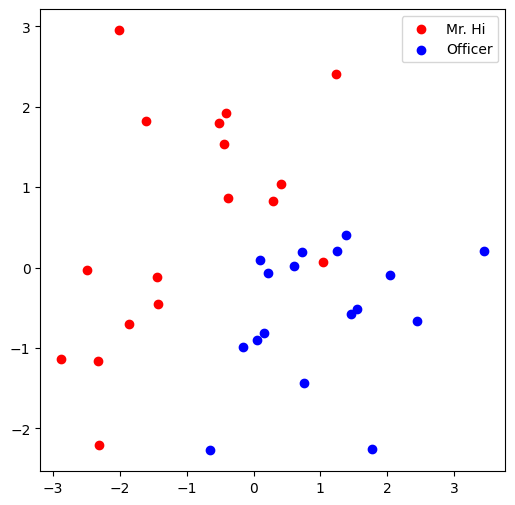

In [45]:
visualize_emb(embedding_new)

In [46]:
embedding_new.parameters()  #embedding itself is a layer in torch that can be trained during the times.

<generator object Module.parameters at 0x79c69dc0d9a0>

# Graph neural network

- We start to explore GNN in more detail

In [47]:
# Import necessary libraries
import torch
import torch.nn.functional as F
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx

In [48]:
data.train_mask   #We explore whether these nodes are suppoed in the training set or not
# True: this node is in the training set
#False: this node is not in training set

tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])

In [49]:
G.degree()  #Explore degree again;0 has 16 degree

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

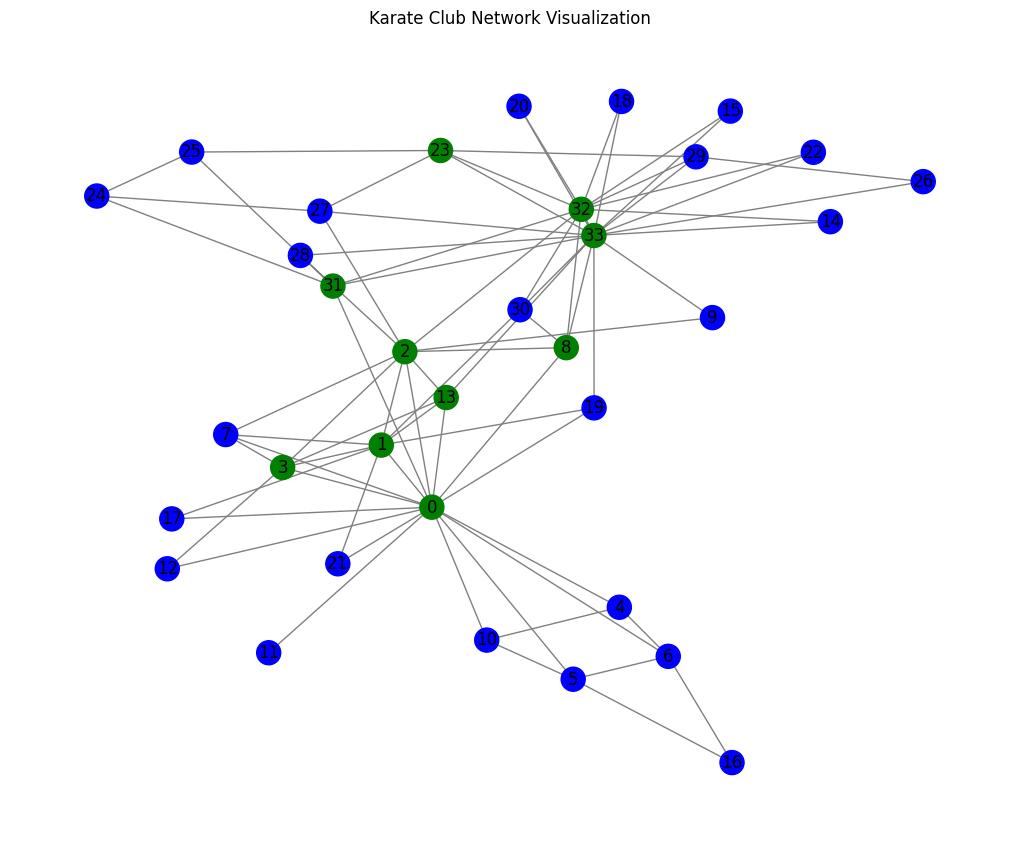

In [50]:
avg=sum(dict(Data.degree()).values())/len(dict(Data.degree()).values())
colour=[]
for i in Data.nodes():
  if Data.degree[i]>avg:
      colour.append("green")
  else:
      colour.append("blue")

plt.figure(figsize=(10, 8))
nx.draw(Data,node_color=colour,with_labels=True, node_size=300, edge_color='gray')
plt.title('Karate Club Network Visualization')
plt.show()

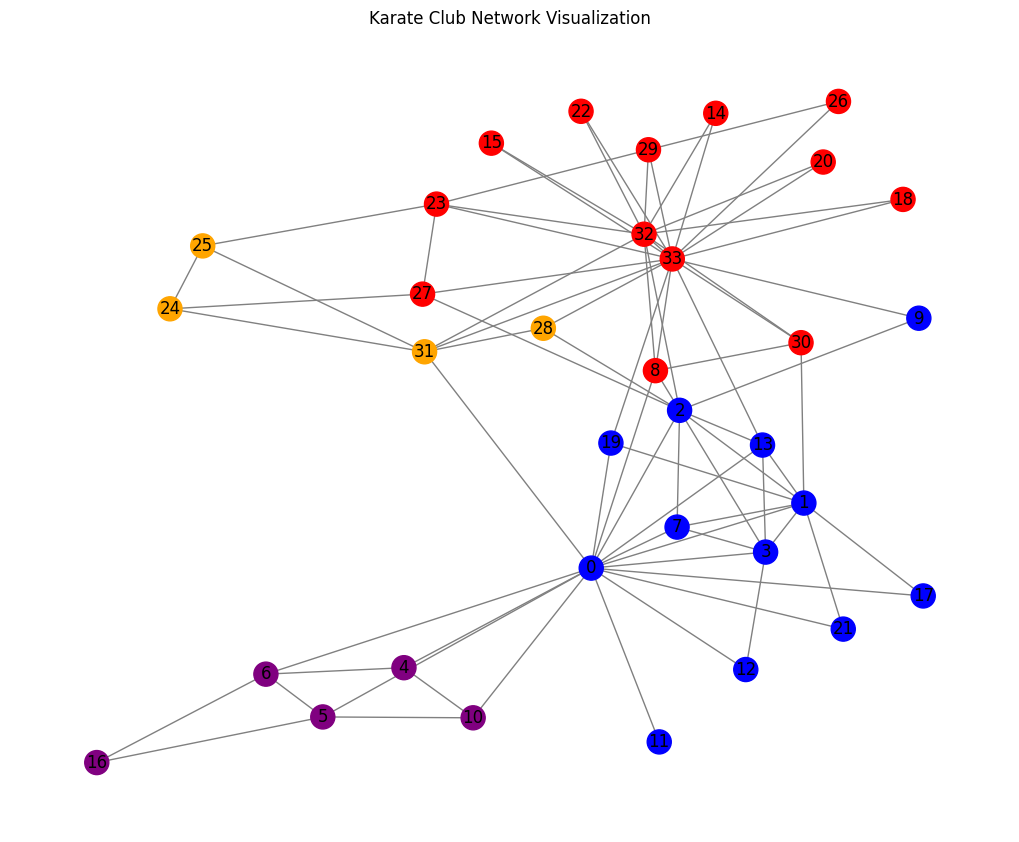

In [51]:
colour=[]
for label in data.y:
  if label.item()==0:
      colour.append("red")
  if label.item()==1:
      colour.append("blue")
  if label.item()==2:
      colour.append("orange")

  if label.item()==3:
      colour.append("purple")

plt.figure(figsize=(10, 8))
nx.draw(Data,node_color=colour,with_labels=True, node_size=300, edge_color='gray')
plt.title('Karate Club Network Visualization')
plt.show()

### GCN layers


We develop graph neural network architectures that are unaffected by the ordering of nodes within a graph and this is called GCN. These models should produce consistent results regardless of node permutations.

We would train a GCN models with aggregating features and messages.
Also we need to mention this is classification task as we have seen our Graph Data has 4 classes.




In [52]:
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels):
      #input channel: the features of each node
      #output channels: the number of class
      #hidden_channels
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_channels, hidden_channels)   #we only do two hops aways so we have only two GCN convoluation layer
        self.conv2 = GCNConv(hidden_channels, output_channels)

    def forward(self, x, edge_index):   #the input is the set of nodes and set of the edge_index
        # First GCN layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)

        # Second GCN layer
        x = self.conv2(x, edge_index)

        return x

hidden_channels = 16
model = GCN(dataset.num_node_features, hidden_channels, dataset.num_classes)




In our model training,we only use the list of output nodes which match the true values in data.train_mask:

- In this case we have 4 data for training.


In [53]:
model(data.x,data.edge_index)[data.train_mask]

tensor([[-2.0890e-02, -8.6448e-02,  5.3484e-02, -6.8472e-02],
        [-1.8559e-03, -4.6193e-02,  8.1122e-02, -6.2344e-02],
        [-3.4868e-02, -7.5834e-02,  3.0545e-02, -3.8244e-02],
        [ 2.3991e-05, -4.6106e-02,  6.4195e-02, -7.1245e-04]],
       grad_fn=<IndexBackward0>)

- The total number of putput nodes are 34:


In [54]:
model(data.x,data.edge_index)

tensor([[-2.0890e-02, -8.6448e-02,  5.3484e-02, -6.8472e-02],
        [-1.3050e-02, -1.1435e-02, -8.0241e-03, -4.7414e-02],
        [-4.1726e-03, -5.0007e-02,  4.5809e-02, -3.1750e-02],
        [ 2.1219e-02, -5.1631e-02,  1.1763e-02,  1.1361e-03],
        [-1.8559e-03, -4.6193e-02,  8.1122e-02, -6.2344e-02],
        [-1.0587e-02, -3.5584e-02,  2.0954e-02, -3.5193e-02],
        [ 5.6710e-03, -3.6855e-02,  2.7790e-02, -2.5265e-02],
        [ 5.2158e-03, -4.4140e-02,  1.8997e-02, -1.4593e-02],
        [-3.4868e-02, -7.5834e-02,  3.0545e-02, -3.8244e-02],
        [-2.4113e-02, -2.5547e-02,  2.8561e-02, -3.5470e-02],
        [-2.4206e-03, -5.5491e-02,  8.9422e-02, -6.2680e-02],
        [ 1.1313e-02, -1.4263e-01,  8.8649e-02, -2.1753e-02],
        [ 1.9496e-02, -6.6331e-02,  3.1120e-02,  1.5794e-02],
        [ 3.7196e-03, -4.4024e-02,  1.2568e-02, -1.7503e-02],
        [-9.4155e-02, -4.3471e-02, -1.7021e-02, -6.0399e-02],
        [-5.8287e-02, -6.3774e-02,  8.2736e-03, -6.3721e-02],
        

Define Our training:

In [55]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)


for epoch in range(100):
  model.train()   #tell the model we are training it


  optimizer.zero_grad() #reset the optimizer to have zero gradient each time so that graidents will not be added up

  output=model(data.x,data.edge_index)  #out input of model includes the features of the nodes and the edge index

  loss = F.cross_entropy(output[data.train_mask], data.y[data.train_mask])  #use cross_entropy lost

  loss.backward()   #caluclate the gradient as before



  optimizer.step() #update weight

  model.eval()  #turn the model into evaluation model

  accuracy= sum(data.y==model(data.x,data.edge_index).argmax(dim=1)).item()/len(data.y)
  #we count the accuracy with true value data.y with the index of the maximum probablity of each nodes

  print(f'Epoch {epoch+1}: Loss: {loss.item()}')
  print(f'Test Accuracy for {epoch+1}: {accuracy}')
  print('=====================================')


Epoch 1: Loss: 1.4015132188796997
Test Accuracy for 1: 0.23529411764705882
Epoch 2: Loss: 1.3759723901748657
Test Accuracy for 2: 0.38235294117647056
Epoch 3: Loss: 1.3516716957092285
Test Accuracy for 3: 0.35294117647058826
Epoch 4: Loss: 1.3299061059951782
Test Accuracy for 4: 0.35294117647058826
Epoch 5: Loss: 1.3100557327270508
Test Accuracy for 5: 0.4117647058823529
Epoch 6: Loss: 1.2895371913909912
Test Accuracy for 6: 0.47058823529411764
Epoch 7: Loss: 1.2685024738311768
Test Accuracy for 7: 0.5588235294117647
Epoch 8: Loss: 1.2472624778747559
Test Accuracy for 8: 0.5882352941176471
Epoch 9: Loss: 1.2250070571899414
Test Accuracy for 9: 0.6176470588235294
Epoch 10: Loss: 1.2012274265289307
Test Accuracy for 10: 0.6176470588235294
Epoch 11: Loss: 1.1760742664337158
Test Accuracy for 11: 0.6470588235294118
Epoch 12: Loss: 1.1499640941619873
Test Accuracy for 12: 0.6764705882352942
Epoch 13: Loss: 1.1224021911621094
Test Accuracy for 13: 0.7058823529411765
Epoch 14: Loss: 1.0934582

GraphSAGE Layer:

We can also graph data by learning the adding aggregating from local neighborhood in different way using graphSAGE layer.

In [56]:
from torch_geometric.nn import SAGEConv

class GraphSAGE(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels):
      #input channel: the features of each node
      #output channels: the number of class
      #hidden_channels
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(input_channels, hidden_channels,aggr="sum")   #we only do two hops aways so we have only two GCN convoluation layer
        self.conv2 = SAGEConv(hidden_channels, output_channels,aggr="mean")

    def forward(self, x, edge_index):   #the input is the set of nodes and set of the edge_index
        # First GCN layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)

        # Second GCN layer
        x = self.conv2(x, edge_index)

        return x

hidden_channels = 16
model = GraphSAGE(dataset.num_node_features, hidden_channels, dataset.num_classes)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  #need to add it again

In [57]:
for epoch in range(100):
  model.train()   #tell the model we are training it


  optimizer.zero_grad() #reset the optimizer to have zero gradient each time so that graidents will not be added up

  output=model(data.x,data.edge_index)  #out input of model includes the features of the nodes and the edge index

  loss = F.cross_entropy(output[data.train_mask], data.y[data.train_mask])  #use cross_entropy lost

  loss.backward()   #caluclate the gradient as before



  optimizer.step() #update weight

  model.eval()  #turn the model into evaluation model

  accuracy= sum(data.y==model(data.x,data.edge_index).argmax(dim=1)).item()/len(data.y)
  #we count the accuracy with true value data.y with the index of the maximum probablity of each nodes

  print(f'Epoch {epoch+1}: Loss: {loss.item()}')
  print(f'Test Accuracy for {epoch+1}: {accuracy}')
  print('=====================================')

Epoch 1: Loss: 1.3768037557601929
Test Accuracy for 1: 0.5588235294117647
Epoch 2: Loss: 1.2808972597122192
Test Accuracy for 2: 0.6470588235294118
Epoch 3: Loss: 1.1972992420196533
Test Accuracy for 3: 0.7058823529411765
Epoch 4: Loss: 1.1112011671066284
Test Accuracy for 4: 0.7058823529411765
Epoch 5: Loss: 1.021777629852295
Test Accuracy for 5: 0.7352941176470589
Epoch 6: Loss: 0.9301567077636719
Test Accuracy for 6: 0.7352941176470589
Epoch 7: Loss: 0.8397879600524902
Test Accuracy for 7: 0.7352941176470589
Epoch 8: Loss: 0.7493076324462891
Test Accuracy for 8: 0.7058823529411765
Epoch 9: Loss: 0.6610510349273682
Test Accuracy for 9: 0.7058823529411765
Epoch 10: Loss: 0.5765962600708008
Test Accuracy for 10: 0.6764705882352942
Epoch 11: Loss: 0.4975507855415344
Test Accuracy for 11: 0.7352941176470589
Epoch 12: Loss: 0.42240920662879944
Test Accuracy for 12: 0.7058823529411765
Epoch 13: Loss: 0.3535692095756531
Test Accuracy for 13: 0.7352941176470589
Epoch 14: Loss: 0.291760355234

However not all nodes's neighbors are equally important.Therefore we need Graph neural network:

In [58]:
from torch_geometric.nn import GATConv



class GAT(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels):
        super(GAT, self).__init__()
        self.conv1 = GATConv(input_channels, hidden_channels)
        self.conv2 = GATConv(hidden_channels, output_channels)

    def forward(self, x, edge_index):
        # First SAGE layer
        x = self.conv1(x, edge_index)
        x = F.relu(x)

        # Second SAGE layer
        x,attn = self.conv2(x, edge_index,return_attention_weights=True) #we also return the attentions weights for the network e.g
        #the alpha_uv

        return x,attn

In [59]:

hidden_channels = 16
model = GAT(dataset.num_node_features, hidden_channels, dataset.num_classes)  #Alert:order cannot be reverse-cannot define optimizer before model
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
for epoch in range(100):
  model.train()   #tell the model we are training it


  optimizer.zero_grad() #reset the optimizer to have zero gradient each time so that graidents will not be added up

  output,attn=model(data.x,data.edge_index)  #out input of model includes the features of the nodes and the edge index

  loss = F.cross_entropy(output[data.train_mask], data.y[data.train_mask])  #use cross_entropy lost

  loss.backward()   #caluclate the gradient as before



  optimizer.step() #update weight

  model.eval()  #turn the model into evaluation model
  out,attn=model(data.x,data.edge_index)
  accuracy= sum(data.y==out.argmax(dim=1)).item()/len(data.y)
  #we count the accuracy with true value data.y with the index of the maximum probablity of each nodes

  print(f'Epoch {epoch+1}: Loss: {loss.item()}')
  print(f'Test Accuracy for {epoch+1}: {accuracy}')
  print(attn[1].shape)
  print('=====================================')


Epoch 1: Loss: 1.363736867904663
Test Accuracy for 1: 0.38235294117647056
torch.Size([190, 1])
Epoch 2: Loss: 1.3378238677978516
Test Accuracy for 2: 0.4117647058823529
torch.Size([190, 1])
Epoch 3: Loss: 1.313051700592041
Test Accuracy for 3: 0.5
torch.Size([190, 1])
Epoch 4: Loss: 1.2897822856903076
Test Accuracy for 4: 0.5588235294117647
torch.Size([190, 1])
Epoch 5: Loss: 1.266011118888855
Test Accuracy for 5: 0.5588235294117647
torch.Size([190, 1])
Epoch 6: Loss: 1.2414549589157104
Test Accuracy for 6: 0.5588235294117647
torch.Size([190, 1])
Epoch 7: Loss: 1.215968370437622
Test Accuracy for 7: 0.6176470588235294
torch.Size([190, 1])
Epoch 8: Loss: 1.190208911895752
Test Accuracy for 8: 0.6176470588235294
torch.Size([190, 1])
Epoch 9: Loss: 1.1638405323028564
Test Accuracy for 9: 0.6470588235294118
torch.Size([190, 1])
Epoch 10: Loss: 1.137052297592163
Test Accuracy for 10: 0.6470588235294118
torch.Size([190, 1])
Epoch 11: Loss: 1.1091077327728271
Test Accuracy for 11: 0.705882352

Explore the output and the weight attention :

In [60]:
output.shape,output[0]

#output of the model is the 34 nodes with the unormalized probablity for each class.
#for example we have the output of node 0 with tensor([-3.5852,  7.2641, -1.1801, -2.7060]  which means node 1 are very likely in class 1.

(torch.Size([34, 4]),
 tensor([-1.8544,  4.8133, -2.9306, -1.7385], grad_fn=<SelectBackward0>))

In [61]:
attn[0]   #attn 0 is the edges index again.

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,  0,  1,  2,  3,  4,  5,
          6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
         24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9

In [62]:
attn[1][0:10]    #attention weight is the weight of the edges (importance of them)

#we have 190 of them,why?

tensor([[3.4467e-07],
        [8.0804e-04],
        [2.9229e-04],
        [2.5805e-01],
        [2.0449e-01],
        [2.1269e-01],
        [3.6921e-04],
        [1.4438e-06],
        [2.5502e-01],
        [8.2019e-03]], grad_fn=<SliceBackward0>)

In [63]:
attn[0].t()[0:10],len(attn[0].t())

#These are our weights(we just print 10 of them) and we have 190.
# The reason we choose transpose .t() is because we want to turn into weights

(tensor([[ 0,  1],
         [ 0,  2],
         [ 0,  3],
         [ 0,  4],
         [ 0,  5],
         [ 0,  6],
         [ 0,  7],
         [ 0,  8],
         [ 0, 10],
         [ 0, 11]]),
 190)

In [64]:
Total_weights=data.num_edges+data.num_nodes
Total_weights  #we can also see the 190 is because the num_edges and the self_edges (each node has one self edge)

attn[0].t()[-33:-29],Total_weights

#We include the self-edge weights as well.

(tensor([[1, 1],
         [2, 2],
         [3, 3],
         [4, 4]]),
 190)

### In the next task we will use other dataset to explore the whole graph instead of focusing in nodes.

In [65]:
from torch_geometric.datasets import TUDataset


# Load the MUTAG dataset
dataset = TUDataset(root='content/data/ENZYMES', name='ENZYMES')

# Print some information about the dataset
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')
print (dataset)

# Access the first graph in the dataset
# Note that in this case, we have 188 graphs in the dataset. Each graph represents one chemical compound
data = dataset[0]
print(f'\nFirst graph in the dataset: {data}')
print('===============================')
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Processing...


Dataset: ENZYMES(600):
Number of graphs: 600
Number of features: 3
Number of classes: 6
ENZYMES(600)

First graph in the dataset: Data(edge_index=[2, 168], x=[37, 3], y=[1])
Number of nodes: 37
Number of edges: 168
Average node degree: 4.54
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


Done!
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


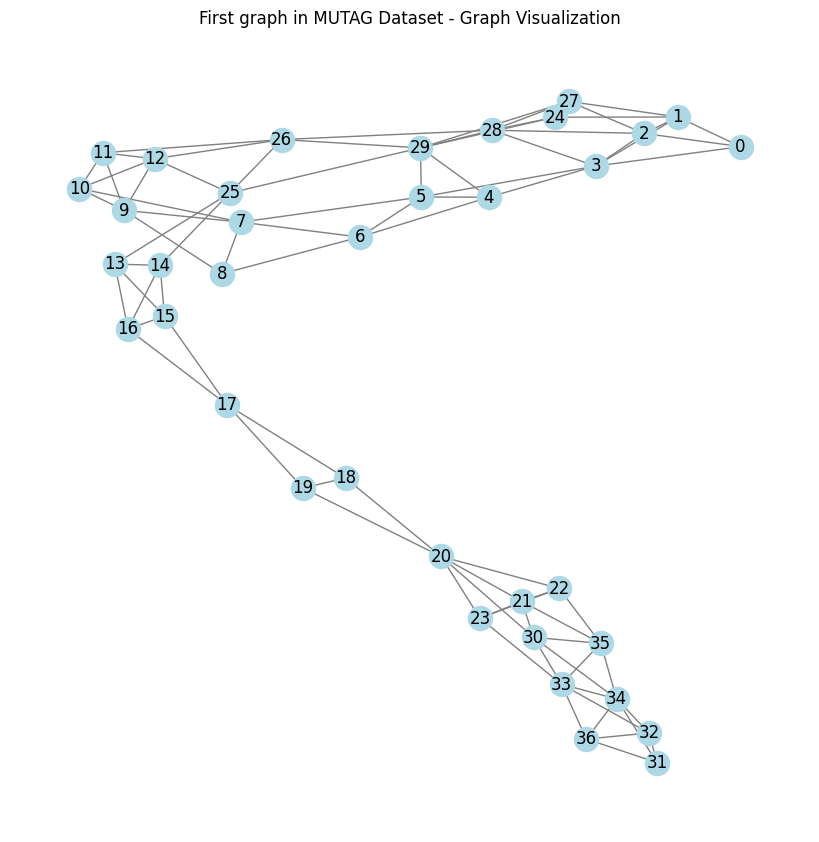

In [66]:
# Convert the graph to a NetworkX graph for visualization
G = to_networkx(data, to_undirected=True)

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('First graph in MUTAG Dataset - Graph Visualization')
plt.show()

Explanation of the code:

We define the GCN model,SCGE model and GAT model
We have three layers and x is the input of dimention (number of nodes,number of node features)

In [67]:
from torch_geometric.nn import global_mean_pool, global_max_pool

#
# and `batch` is a vector of shape [num_nodes], indicating the batch index for each node
# graph_features = global_mean_pool(x, batch)

class GCN(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.linear = torch.nn.Linear(hidden_channels, output_channels)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)

        x = self.conv2(x, edge_index)
        x = F.relu(x)

        x = self.conv3(x, edge_index)
        x = F.relu(x)

        # Global Mean Pooling
        x = global_mean_pool(x, batch)

        x = self.linear(x)

        return x


class SAGE(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels):
        super(SAGE, self).__init__()
        self.conv1 = SAGEConv(input_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.conv3 = SAGEConv(hidden_channels, hidden_channels)
        self.linear = torch.nn.Linear(hidden_channels, output_channels)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)

        x = self.conv2(x, edge_index)
        x = F.relu(x)

        x = self.conv3(x, edge_index)
        x = F.relu(x)

        # Global Mean Pooling
        x = global_mean_pool(x, batch)

        x = self.linear(x)

        return x

class GAT(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels):
        super(GAT, self).__init__()
        self.conv1 = GATConv(input_channels, hidden_channels)
        self.conv2 = GATConv(hidden_channels, hidden_channels)
        self.conv3 = GATConv(hidden_channels, hidden_channels)
        self.linear = torch.nn.Linear(hidden_channels, output_channels)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)

        x = self.conv2(x, edge_index)
        x = F.relu(x)

        x = self.conv3(x, edge_index)
        x = F.relu(x)

        # Global Mean Pooling
        x = global_mean_pool(x, batch) #this needs the node batches.

        x = self.linear(x)

        return x


Explore the real sturcture of test_loader[0] and the batch.

Out test_loader has 120 graphs and the len is 120 if we have batch_size=1


In [93]:
from torch_geometric.loader import DataLoader

# Shuffle the dataset
dataset = dataset.shuffle()

# Split the dataset into train and test sets
train_dataset = dataset[:480]
test_dataset = dataset[480:]


test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
len(test_loader)

120

In [94]:
num=0
for i in test_loader:
  if num==0:
    count=i
  num=num+1
  print (i)
  if num==4:
      break

#this is the first element of our dataset and the batch is 57 which is exactly the number of node of the first graph.
#We have 210 edges,3 feature of 57 nodes and one label and each node is a batch.

DataBatch(edge_index=[2, 86], x=[21, 3], y=[1], batch=[21], ptr=[2])
DataBatch(edge_index=[2, 116], x=[37, 3], y=[1], batch=[37], ptr=[2])
DataBatch(edge_index=[2, 164], x=[47, 3], y=[1], batch=[47], ptr=[2])
DataBatch(edge_index=[2, 108], x=[26, 3], y=[1], batch=[26], ptr=[2])


In [95]:
#We can see it is the same if we print out the first 4 element from the dataset.

test_dataset[0],test_dataset[1],test_dataset[2],test_dataset[3]

(Data(edge_index=[2, 86], x=[21, 3], y=[1]),
 Data(edge_index=[2, 116], x=[37, 3], y=[1]),
 Data(edge_index=[2, 164], x=[47, 3], y=[1]),
 Data(edge_index=[2, 108], x=[26, 3], y=[1]))

In [71]:
for i in test_loader:
  print (i.y)  #each graph has an y label(there are 6 classes)

tensor([0])
tensor([5])
tensor([5])
tensor([0])
tensor([2])
tensor([0])
tensor([3])
tensor([4])
tensor([4])
tensor([5])
tensor([1])
tensor([1])
tensor([4])
tensor([3])
tensor([4])
tensor([2])
tensor([4])
tensor([1])
tensor([1])
tensor([5])
tensor([2])
tensor([4])
tensor([1])
tensor([4])
tensor([0])
tensor([2])
tensor([1])
tensor([2])
tensor([3])
tensor([5])
tensor([1])
tensor([3])
tensor([0])
tensor([5])
tensor([5])
tensor([3])
tensor([1])
tensor([0])
tensor([5])
tensor([3])
tensor([2])
tensor([1])
tensor([0])
tensor([0])
tensor([1])
tensor([5])
tensor([0])
tensor([5])
tensor([3])
tensor([4])
tensor([4])
tensor([1])
tensor([2])
tensor([3])
tensor([1])
tensor([5])
tensor([2])
tensor([2])
tensor([5])
tensor([1])
tensor([3])
tensor([0])
tensor([2])
tensor([4])
tensor([0])
tensor([3])
tensor([3])
tensor([0])
tensor([4])
tensor([0])
tensor([3])
tensor([1])
tensor([3])
tensor([1])
tensor([1])
tensor([2])
tensor([0])
tensor([0])
tensor([0])
tensor([5])
tensor([3])
tensor([5])
tensor([3])
tens

What happens if we set the batch to be 2:

it seems each databatch is the combination of two datapoint

e.g we see DataBatch(edge_index=[2, 312], x=[87, 3], y=[2], batch=[87], ptr=[3])
which is the combination of :     
- Data(edge_index=[2, 210], x=[57, 3], y=[1])
- Data(edge_index=[2, 102], x=[30, 3], y=[1])

e.g 87=57+30 in x , 2=1+1 in y ,batch=57+30.... edge index=210+102=312


In [72]:
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)
len(test_loader)

60

In [73]:
num=0
for i in test_loader:
  num=num+1
  print (i)
  if num==2:
      break


DataBatch(edge_index=[2, 118], x=[34, 3], y=[2], batch=[34], ptr=[3])
DataBatch(edge_index=[2, 276], x=[69, 3], y=[2], batch=[69], ptr=[3])


We can print out the batch of the data in the second node:
We have the

(1) DataBatch(edge_index=[2, 276], x=[77, 3], y=[2], batch=[77], ptr=[3])

which is compose of (2) and (3)
e.g x=25+52 , 276=102 + 174 (from 2 and 3)

WE have two graph(each graph is a data point):

(2) (edge_index=[2, 102], x=[25, 3], y=[1]),
(3) Data(edge_index=[2, 174], x=[52, 3], y=[1])

There are 77 element in total. 0 represents the data from graph (2)
and 1 represents the data from graph (3)
We have 25 nodes from (2) and 52 node from (3)

there are 25 : 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0

there are 52 :  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1



In [74]:
i.batch,len(i.batch)

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 69)

In [75]:
#we print out the set of 10 nodes with the features in combined graph number 2 (DataBatch(edge_index=[2, 310], x=[74, 3], y=[2], batch=[74], ptr=[3]))
i.x[0:10],i.y[0:10]  #the first part of the nodes from the first graph has label 5 and the second part of the nodes from the second graph has label 3

(tensor([[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.]]),
 tensor([5, 0]))

In [76]:
i.edge_index  #this is the edge_index

tensor([[ 0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,
          4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  8,
          8,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12,
         12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17,
         17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21,
         21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 25,
         25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 29, 29, 29, 30,
         30, 30, 30, 30, 30, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 34, 34, 34,
         34, 35, 35, 35, 35, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38, 38, 38,
         39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 43, 43, 43,
         43, 44, 44, 44, 45, 45, 45, 46, 46, 46, 46, 47, 47, 47, 47, 48, 48, 48,
         48, 49, 49, 49, 50, 50, 51, 51, 51, 51, 52, 52, 52, 52, 52, 53, 53, 53,
         53, 54, 54, 54, 54,

Our we have the batch of 60 in our model:


In [85]:

# Wrap the datset using Dataloader
train_loader = DataLoader(train_dataset, batch_size=60, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=60, shuffle=False)

In [86]:
# Initialize the three models defined in exercise 3
hidden_channels = 16
GCNmodel = GCN(dataset.num_node_features, hidden_channels, dataset.num_classes)
SAGEmodel = SAGE(dataset.num_node_features, hidden_channels, dataset.num_classes)
GATmodel = GAT(dataset.num_node_features, hidden_channels, dataset.num_classes)

# Define the optimizers for the three models
GCNoptimizer = torch.optim.Adam(GCNmodel.parameters(), lr=0.01)
SAGEoptimizer = torch.optim.Adam(SAGEmodel.parameters(), lr=0.01)
GAToptimizer = torch.optim.Adam(GATmodel.parameters(), lr=0.01)




We define the accuracy function and training loop for convenience:

In [79]:
def accuracy(model, loader):
    model.eval()
    correct = 0
    for data in loader:
        pred = model(data.x, data.edge_index, data.batch)  #the input nodes and the input edges index
        pred = pred.argmax(dim=1)
        correct += sum(pred==data.y).item()
    accuracy = correct / len(loader.dataset)
    return accuracy



We explain the line global_mean_pool(x, batch) here:
Firstly we get one batch from the train_loader as example:


In [90]:
#we focus in the first batch of our nodes:
for data in train_loader:
  testdata=data
  break
data

DataBatch(edge_index=[2, 7528], x=[2010, 3], y=[60], batch=[2010], ptr=[61])

The first batch has a total of 1932 nodes with 3 features:

In [91]:
data_x=testdata.x  #the first batch has total of 2010 nodes with 3 features for each node
data_x,data_x.shape

(tensor([[1., 0., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         ...,
         [0., 1., 0.],
         [0., 1., 0.],
         [0., 1., 0.]]),
 torch.Size([2010, 3]))

The testdata is from 60 of different graphs(since one batch of data has 60 datapoints).
The testdata.batch is consisted of the "graph label"(from one one the graph from 0 to 60) of the 1932 nodes

In [82]:
testdata.batch  # they are from 60 different graphs (since we have batch of 60=> each nodes have such a label to represent the datapoint (in graph level).

tensor([ 0,  0,  0,  ..., 59, 59, 59])

The testdata has 60 points and there are 6 class for each graph
this is the lists of labels for the batch of graphs

In [83]:
testdata.y  #there are 60 different graphs with different labels with 6 classes #the label here is the dataset.label #not the label for the graph inside the batch

tensor([4, 4, 4, 4, 3, 3, 2, 0, 2, 1, 2, 0, 1, 5, 4, 0, 0, 2, 2, 5, 0, 0, 5, 1,
        5, 3, 4, 0, 4, 0, 3, 0, 3, 4, 4, 2, 2, 1, 1, 1, 1, 4, 4, 1, 5, 5, 3, 4,
        3, 0, 4, 5, 1, 3, 4, 0, 1, 1, 3, 1])

## Explanation of global_mean_pool:

To simplify the result,we only use one layer:

In [122]:
first_output=GATConv(dataset.num_node_features, 16)  #take one GTAConv
out1=first_output(testdata.x,testdata.edge_index)
print (out1.shape)


torch.Size([2010, 16])


We can see the the nodes size in the first output is reduced to the batch size in the first dimention:

In [136]:
out1[0:21].mean(axis=0)

tensor([-0.2389,  0.0820, -0.2816, -0.2587, -0.1381,  0.0995,  0.0556, -0.1964,
        -0.0073,  0.1760,  0.2727,  0.2454,  0.0106,  0.0539,  0.3716,  0.1238],
       grad_fn=<MeanBackward1>)

Because they are from the same graph (each node in testdata.batch is one graph only):

In [131]:
testdata.batch[0:21]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

We can do the same thing using global_mean_pool:

In [139]:
global_mean_pool(out1,testdata.batch)[0]

tensor([-0.2389,  0.0820, -0.2816, -0.2587, -0.1381,  0.0995,  0.0556, -0.1964,
        -0.0073,  0.1760,  0.2727,  0.2454,  0.0106,  0.0539,  0.3716,  0.1238],
       grad_fn=<SelectBackward0>)

## We can train our model now:

notice we need to add the total loss with loss.item() ( the average loss in one batch) X data.num_graphs (the number of data points in one batch)
since we need to divide the number of sample in the whole dataset.

In [140]:
# Training loop
def train(model, optimizer):
    model.train()

    total_loss = 0
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.batch)
        loss = F.cross_entropy(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    return total_loss / len(train_loader.dataset)


In [153]:
# Run the training and testing for GCN Model
# Define the optimizers for the three models


class GCN(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels, output_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        #self.conv3 = GCNConv(hidden_channels, hidden_channels)  dont do it as it has overflow problem
        self.linear = torch.nn.Linear(hidden_channels, output_channels)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)
        x = F.relu(x)

        x = self.conv2(x, edge_index)
        x = F.relu(x)

        #x = self.conv3(x, edge_index)
        #x = F.relu(x)

        # Global Mean Pooling
        x = global_mean_pool(x, batch)

        x = self.linear(x)

        return x



GCNmodel = GCN(dataset.num_node_features,64, dataset.num_classes)


GCNoptimizer = torch.optim.Adam(GCNmodel.parameters(), lr=0.01)



for epoch in range(200):
    loss = train(GCNmodel, GCNoptimizer)
    train_acc = accuracy(GCNmodel, train_loader)
    test_acc = accuracy(GCNmodel, test_loader)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch: 000, Loss: 1.7960, Train Acc: 0.1979, Test Acc: 0.1917
Epoch: 001, Loss: 1.7735, Train Acc: 0.2333, Test Acc: 0.1833
Epoch: 002, Loss: 1.7481, Train Acc: 0.2333, Test Acc: 0.2083
Epoch: 003, Loss: 1.7494, Train Acc: 0.2667, Test Acc: 0.2333
Epoch: 004, Loss: 1.7334, Train Acc: 0.2042, Test Acc: 0.1333
Epoch: 005, Loss: 1.7255, Train Acc: 0.2708, Test Acc: 0.3167
Epoch: 006, Loss: 1.7180, Train Acc: 0.2437, Test Acc: 0.1750
Epoch: 007, Loss: 1.7197, Train Acc: 0.2875, Test Acc: 0.2083
Epoch: 008, Loss: 1.6956, Train Acc: 0.2958, Test Acc: 0.3000
Epoch: 009, Loss: 1.7001, Train Acc: 0.2562, Test Acc: 0.2000
Epoch: 010, Loss: 1.6848, Train Acc: 0.2833, Test Acc: 0.3000
Epoch: 011, Loss: 1.6788, Train Acc: 0.2979, Test Acc: 0.2000
Epoch: 012, Loss: 1.6785, Train Acc: 0.3063, Test Acc: 0.2417
Epoch: 013, Loss: 1.6724, Train Acc: 0.2625, Test Acc: 0.1917
Epoch: 014, Loss: 1.6741, Train Acc: 0.2938, Test Acc: 0.2500
Epoch: 015, Loss: 1.6742, Train Acc: 0.3000, Test Acc: 0.2333
Epoch: 0

In [146]:

for epoch in range(100):
    loss = train(SAGEmodel, SAGEoptimizer)
    train_acc = accuracy(SAGEmodel, train_loader)
    test_acc = accuracy(SAGEmodel, test_loader)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch: 000, Loss: 1.7982, Train Acc: 0.1958, Test Acc: 0.1583
Epoch: 001, Loss: 1.7857, Train Acc: 0.2333, Test Acc: 0.1750
Epoch: 002, Loss: 1.7683, Train Acc: 0.1812, Test Acc: 0.1000
Epoch: 003, Loss: 1.7605, Train Acc: 0.2333, Test Acc: 0.1667
Epoch: 004, Loss: 1.7488, Train Acc: 0.2292, Test Acc: 0.2000
Epoch: 005, Loss: 1.7443, Train Acc: 0.2583, Test Acc: 0.2750
Epoch: 006, Loss: 1.7384, Train Acc: 0.2583, Test Acc: 0.1917
Epoch: 007, Loss: 1.7269, Train Acc: 0.2958, Test Acc: 0.2583
Epoch: 008, Loss: 1.7220, Train Acc: 0.2750, Test Acc: 0.1833
Epoch: 009, Loss: 1.7138, Train Acc: 0.2750, Test Acc: 0.2667
Epoch: 010, Loss: 1.7037, Train Acc: 0.2479, Test Acc: 0.2083
Epoch: 011, Loss: 1.7130, Train Acc: 0.2875, Test Acc: 0.2500
Epoch: 012, Loss: 1.7131, Train Acc: 0.2625, Test Acc: 0.2250
Epoch: 013, Loss: 1.6903, Train Acc: 0.2646, Test Acc: 0.1917
Epoch: 014, Loss: 1.6942, Train Acc: 0.2729, Test Acc: 0.2750
Epoch: 015, Loss: 1.6893, Train Acc: 0.2771, Test Acc: 0.2250
Epoch: 0

In [147]:
# Run the training and testing for GAT Model
for epoch in range(100):
    loss = train(GATmodel, GAToptimizer)
    train_acc = accuracy(GATmodel, train_loader)
    test_acc = accuracy(GATmodel, test_loader)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch: 000, Loss: 1.7958, Train Acc: 0.1979, Test Acc: 0.1333
Epoch: 001, Loss: 1.7834, Train Acc: 0.2083, Test Acc: 0.1583
Epoch: 002, Loss: 1.7715, Train Acc: 0.2396, Test Acc: 0.2000
Epoch: 003, Loss: 1.7611, Train Acc: 0.2396, Test Acc: 0.1667
Epoch: 004, Loss: 1.7520, Train Acc: 0.2562, Test Acc: 0.1917
Epoch: 005, Loss: 1.7488, Train Acc: 0.2500, Test Acc: 0.1667
Epoch: 006, Loss: 1.7432, Train Acc: 0.2604, Test Acc: 0.2250
Epoch: 007, Loss: 1.7409, Train Acc: 0.2458, Test Acc: 0.2083
Epoch: 008, Loss: 1.7393, Train Acc: 0.2250, Test Acc: 0.1750
Epoch: 009, Loss: 1.7390, Train Acc: 0.2771, Test Acc: 0.2583
Epoch: 010, Loss: 1.7292, Train Acc: 0.2354, Test Acc: 0.1667
Epoch: 011, Loss: 1.7287, Train Acc: 0.2375, Test Acc: 0.1667
Epoch: 012, Loss: 1.7231, Train Acc: 0.2354, Test Acc: 0.2583
Epoch: 013, Loss: 1.7192, Train Acc: 0.2667, Test Acc: 0.2500
Epoch: 014, Loss: 1.7183, Train Acc: 0.2792, Test Acc: 0.2333
Epoch: 015, Loss: 1.6996, Train Acc: 0.2938, Test Acc: 0.2667
Epoch: 0

In conlusion:

We sccussfully train out models.However our data are so simple and the models seems to be simple.Our accuracy increases slowly.